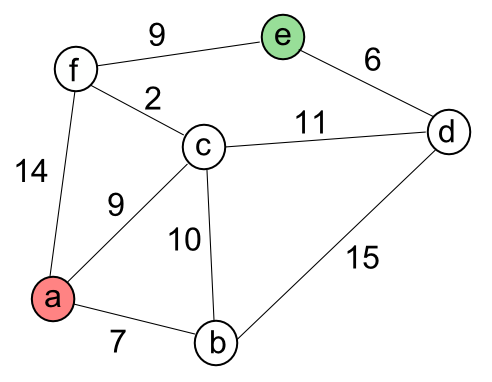

Vertex
A vertex is the most basic part of a graph and it is also called a node. Throughout we'll call it note. A vertex may also have additional information and we'll call it as payload.
Edge
An edge is another basic part of a graph, and it connects two vertices/ Edges may be one-way or two-way. If the edges in a graph are all one-way, the graph is a directed graph, or a digraph. The picture shown above is not a digraph.
Weight
Edges may be weighted to show that there is a cost to go from one vertex to another. For example in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities or traffic status.
Graph
A graph can be represented by $G$ where $G=(V,E)$. $V$ is a set of vertices and $E$ is a set of edges. Each edge is a tuple $(v,w)$ where $w,v \in V$. We can add a third component to the edge tuple to represent a weight. A subgraph $s$ is a set of edges $e$ and vertices $v$ such that $e \in E$ and $v \in V$.
The picture above shows a simple weighted graph and we can represent this graph as the set of six vertices

V={a,b,c,d,e,f}
and the set of nine edges:

E={(a,b,7),(a,c,9),(a,f,14),(b,d,15),(b,c,10),(c,d,11),(c,f,2),(d,e,6),(e,f,9)}
Path
A path in a graph is a sequence of vertices that are connected by edges. We usually define a path as $w_1, w_2,..., w_n$ such that $(w_i, w_{i+1}) \in E$ for all $1 \le i \le n-1$. The unweighted path length is the number of edges in the path $(n-1)$. The weighted path length is the sum of the weights of all the edges in the path. For example in the picture above, the path from $a$ to $e$ is the sequence of vertices $(a, c, d, e)$. The edges are $\{(a, c, 9), (c, d, 11), (d, e, 6)\}$.
Cycle
A cycle in a directed graph is a path that starts and ends at the same vertex. A graph with no cycles is called an acyclic graph. A directed graph with no cycles is called a directed acyclic graph or a DAG.




The Vertex class uses a dictionary (adjacent) to keep track of the vertices to which it is connected, and the weight of each edge. The Vertex constructor initializes the id, which is usually a string, and the adjacent dictionary. The add_neighbor() method is used add a connection from this vertex to another. The get_connections() method returns all of the vertices in the adjacency list. The get_weight() method returns the weight of the edge from this vertex to the vertex passed as a parameter.

The Graph class contains a dictionary(vert-dict) that maps vertex names to vertex objects, and we can see the output by the __str__() method of Vertex class:

g.vert_dict[a]=a adjacent: ['f', 'c', 'b']
Graph also provides methods for adding vertices to a graph and connecting one vertex to another. The get_vertices() method returns the names of all of the vertices in the graph. Also, we have the __iter__() method to make it easy to iterate over all the vertex objects in a particular graph. Together, the two methods allow us to iterate over the vertices in a graph by name, or by the objects themselves.

In main(), we created six vertices laebled 'a' through 'f'. Then we displayed the vertex dictionary. Notice that for each key 'a' through 'f' we have created an instance of a Vertex. Next, we add the edges that connect the vertices together. Finally, a nested loop verifies that each edge in the graph is properly stored.


Reference: https://www.bogotobogo.com/python/python_graph_data_structures.php


In [14]:
"""/* Vertex class uses a dictionary (adjacent) to keep track of the 
vertices to which it is connected, and the weight of each edge */"""
class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        
    def __str__(self):
        return str(self.id)+' adjacent: '+str([x.id for x in self.adjacent])
    
    def add_neighbor (self, neighbor, weight = 0):
        self.adjacent[neighbor] = weight
        
    def get_connections(self):
        return self.adjacent.keys()
    
    def get_id(self):
        return self.id
    
    def get_weight(self, neighbor):
        return self.adjacent[neighbor]
    
class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0 
        
    def __iter__(self):
        return iter(self.vert_dict.values())
    
    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1 
        new_vertex = Vertex(node) 
        self.vert_dict[node] = new_vertex
        return new_vertex
    
    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None 
        
    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)
            
        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)
        
    def get_vertices(self):
        return self.vert_dict.keys()
    
if __name__ == '__main__':

    g = Graph()

    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')
    g.add_vertex('g')
    g.add_vertex('h')

    g.add_edge('a', 'b', 15)  
    g.add_edge('a', 'c', 10)
    g.add_edge('a', 'd', 17)
    g.add_edge('a', 'g', 5)
    g.add_edge('b', 'd', 12)
    g.add_edge('c', 'g', 7)
    g.add_edge('d', 'e', 2)
    g.add_edge('d', 'f', 10)
    g.add_edge('d', 'h', 4)
    g.add_edge('f', 'h', 11)
    g.add_edge('g', 'h', 25)
    
    
#     print (type(g)) 
#     print (dir(g))
#     print ()

    print (f"All Possible nodes:")
    for v in g:
        for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

    for v in g:
        print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))
        
    
#     Calculate the Heuristic



All Possible nodes:
( a , b,  15)
( a , c,  10)
( a , d,  17)
( a , g,   5)
( b , a,  15)
( b , d,  12)
( c , a,  10)
( c , g,   7)
( d , a,  17)
( d , b,  12)
( d , e,   2)
( d , f,  10)
( d , h,   4)
( e , d,   2)
( f , d,  10)
( f , h,  11)
( g , a,   5)
( g , c,   7)
( g , h,  25)
( h , d,   4)
( h , f,  11)
( h , g,  25)
g.vert_dict[a]=a adjacent: ['b', 'c', 'd', 'g']
g.vert_dict[b]=b adjacent: ['a', 'd']
g.vert_dict[c]=c adjacent: ['a', 'g']
g.vert_dict[d]=d adjacent: ['a', 'b', 'e', 'f', 'h']
g.vert_dict[e]=e adjacent: ['d']
g.vert_dict[f]=f adjacent: ['d', 'h']
g.vert_dict[g]=g adjacent: ['a', 'c', 'h']
g.vert_dict[h]=h adjacent: ['d', 'f', 'g']


In [ ]:
    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')

    g.add_edge('a', 'b', 7)  
    g.add_edge('a', 'c', 9)
    g.add_edge('a', 'f', 14)
    g.add_edge('b', 'c', 10)
    g.add_edge('b', 'd', 15)
    g.add_edge('c', 'd', 11)
    g.add_edge('c', 'f', 2)
    g.add_edge('d', 'e', 6)
    g.add_edge('e', 'f', 9)

In [39]:
"""/* Vertex class uses a dictionary (adjacent) to keep track of the 
vertices to which it is connected, and the weight of each edge */"""
class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        
    def __str__(self):
        return str(self.id)+' adjacent: '+str([x.id for x in self.adjacent])
    
    def add_neighbor (self, neighbor, weight = 0):
        self.adjacent[neighbor] = weight
        
    def get_connections(self):
        return self.adjacent.keys()
    
    def get_id(self):
        return self.id
    
    def get_weight(self, neighbor):
        return self.adjacent[neighbor]
    
class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0 
        
    def __iter__(self):
        return iter(self.vert_dict.values())
    
    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1 
        new_vertex = Vertex(node) 
        self.vert_dict[node] = new_vertex
        return new_vertex
    
    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None 
        
    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)
            
        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)
        
    def get_vertices(self):
        return self.vert_dict.keys()
    
    def show_all_nodes(self):
        print (f"All Possible nodes:")
        for v in g:
            for w in v.get_connections():
                vid = v.get_id()
                wid = w.get_id()
                print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

        for v in g:
            print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))
    

    
if __name__ == '__main__':

    g = Graph()

    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')
    g.add_vertex('g')
    g.add_vertex('h')

    g.add_edge('a', 'b', 15)  
    g.add_edge('a', 'c', 10)
    g.add_edge('a', 'd', 17)
    g.add_edge('a', 'g', 5)
    g.add_edge('b', 'd', 12)
    g.add_edge('c', 'g', 7)
    g.add_edge('d', 'e', 2)
    g.add_edge('d', 'f', 10)
    g.add_edge('d', 'h', 4)
    g.add_edge('f', 'h', 11)
    g.add_edge('g', 'h', 25)
    
#     g.show_all_nodes()
#     print (type(g))
#     print (dir(g))
    print (g.vert_dict.keys())
    print (g.vert_dict['a'])
    
    
    
    
    


dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
a adjacent: ['b', 'c', 'd', 'g']


In [ ]:
visitedList = [[]]

def depthFirst(graph, currentVertex, visited):
    visited.append(currentVertex)
    for vertex in graph[currentVertex]:
        if vertex not in visited:
            depthFirst(graph, vertex, visited.copy())
    visitedList.append(visited)

depthFirst(graph, 0, [])


print(visitedList)

Choose graph size (Node amount):
Choose the indexes of start and end nodes:
Start node: 
End node: 
kashyap1
[[17, 2], [74, 47], [35, 52], [55, 15], [92, 50]]
[[-1, 72.6, 53.1, 40.2, -1], [72.6, -1, 39.3, -1, 18.2], [53.1, 39.3, -1, 42.1, -1], [40.2, -1, 42.1, -1, 50.9], [-1, 18.2, -1, 50.9, -1]]
Kashyap2
39.3
420
[[-1, 72.6, 53.1, 40.2, -1], [72.6, -1, 420, -1, 18.2], [53.1, 39.3, -1, 42.1, -1], [40.2, -1, 42.1, -1, 50.9], [-1, 18.2, -1, 50.9, -1]]


7
0
